In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import warnings

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }

sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

warnings.filterwarnings("ignore")

Verileri okuyoruz.

In [5]:
# le, LifeExpectancy
le = pd.read_csv("C:/Users/ozkan/datas/Life_Expectancy_Data.csv")

Analiz için "le" kopyasını alıyoruz ve "df olarak adlandırıyoruz.

In [6]:
df = le.copy()

In [7]:
print("--"*1000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bölüm 1 : Verilere İlk Bakış

Sırasıyla ilk 5 ve son 5 veriyi inceliyoruz.

## 1.1 İlk 5 veri

In [8]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 1.2 Son 5 veri

In [9]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


## 1.3 Sütun İsim Kontrolü

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Sütun isimlerinde gereksiz ve fazla boşluklar var. Bu nedenle aşağıda özel bir liste tanımlayarak tüm sütun isimleri ilk etapta güncelliyoruz. Hepsine "_" kullanarak standart isimlendirme yapıyoruz.

## 1.4 Sütun İsim Düzeltmesi

In [11]:
df_cols = ["Country","Year","Status","Life_expectancy","Adult_Mortality","Infant_deaths","Alcohol","Percentage_expenditure","Hepatitis_B",
         "Measles","BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria","HIV/AIDS","GDP","Population","Thinness_1_19_years",
        "thinness_5_9_years","Income_composition_of_resources","Schooling"]

In [12]:
df.columns = df_cols

In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [14]:
df.shape

(2938, 22)

Toplamda 2938 satır ve 22 sütun var.

In [15]:
print("--"*1000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bölüm 2: Değişkenleri İnceleyelim

## 2.1 Kategorik Değişkenler

2 kategorik değişken var, Country ve Status. Sırasıyla ikisi içinde unique değerleri inceleyelim.

In [16]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [17]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

Status Developing ve Developed olarak 2ye ayrılıyor

## 2.2 Sürekli Değişkenler

İnceleme için temel de 3 farklı değişken seçilmiştir.
1. Life_expectancy
2. Adult_Mortality
3. Infant_deaths

### 2.2.1 Life_expectancy

In [18]:
df.Life_expectancy.describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life_expectancy, dtype: float64

### 2.2.2 Adult_Mortality

In [19]:
df.Adult_Mortality.describe()

count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult_Mortality, dtype: float64

### 2.2.3 Infant_deaths

In [20]:
df.Infant_deaths.describe()

count    2938.000000
mean       30.303948
std       117.926501
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: Infant_deaths, dtype: float64

Veri Tipleri Neler

## 2.3 Veri Tipleri

In [21]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
Infant_deaths                        int64
Alcohol                            float64
Percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1_19_years                float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

Life_expectancy ve Adult_Mortality float tipindedir. Infant_deaths değişkeni int olduğu için dönüşüm uygulayabiliriz.

## 2.4 Veri Tipi Dönüşüm

In [22]:
df["Infant_deaths"]=df.Infant_deaths.astype(float)
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
Infant_deaths                      float64
Alcohol                            float64
Percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1_19_years                float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

## 2.5 Hatalı Değer Kontrolü

Seçilen 3 değişkende, eğer veriler içinde farklı tipte bir veri varsa onu float tipine çeviriyoruz.

In [23]:
for sutun_adi in ["Life_expectancy", "Adult_Mortality","Infant_deaths"]:
    print("{} sütunu için problemli değerler : ".format(sutun_adi))
    hatali_degerler = []
    for deger in df[sutun_adi]:
        try:
            float(deger)
        except:
            hatali_degerler.append(deger)
    print(set(hatali_degerler))

Life_expectancy sütunu için problemli değerler : 
set()
Adult_Mortality sütunu için problemli değerler : 
set()
Infant_deaths sütunu için problemli değerler : 
set()


Kontrol amaçlı info() ile bakıyoruz.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   Infant_deaths                    2938 non-null   float64
 6   Alcohol                          2744 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [25]:
print("--"*1000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bölüm 3 : Eksik Değerlerin Tespiti

## 3.1 Eksik Değerlere Genel Bakış

Yüzde olarak eksik değerleri inceliyoruz

In [26]:
df.isnull().sum()*100/df.shape[0]

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life_expectancy                     0.340368
Adult_Mortality                     0.340368
Infant_deaths                       0.000000
Alcohol                             6.603131
Percentage_expenditure              0.000000
Hepatitis_B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under_five_deaths                   0.000000
Polio                               0.646698
Total_expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
Thinness_1_19_years                 1.157250
thinness_5_9_years                  1.157250
Income_composition_of_resources     5.684139
Schooling                           5.547992
dtype: flo

## 3.2 Seçilen 3 değişken için Eksik Değer Tespiti

In [27]:
variables = ["Life_expectancy","Adult_Mortality","Infant_deaths"]

In [28]:
for sutun_adi in variables:
    print(sutun_adi + " için yüzde eksik değerler: {} ".format(df[sutun_adi].isnull().sum()*100/df.shape[0]))
    print("--"*10)

Life_expectancy için yüzde eksik değerler: 0.34036759700476515 
--------------------
Adult_Mortality için yüzde eksik değerler: 0.34036759700476515 
--------------------
Infant_deaths için yüzde eksik değerler: 0.0 
--------------------


## 3.3 Değişkenler eksik değerli hali ile görsel olarak incelendi

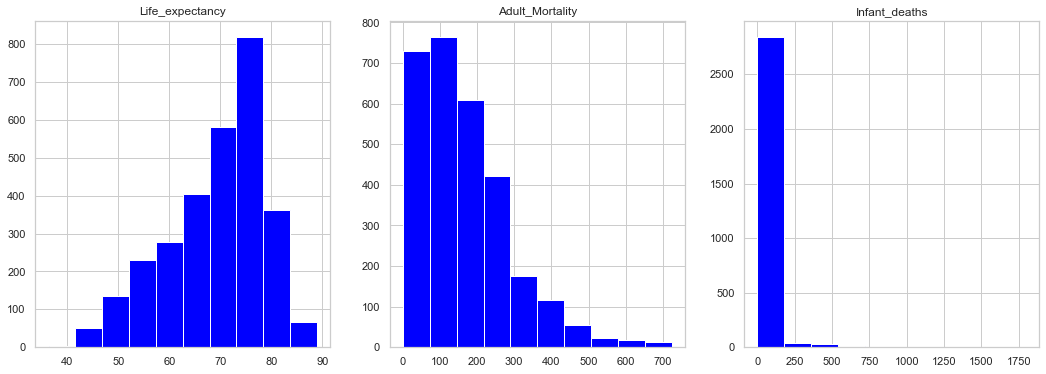

In [29]:
plt.figure(figsize=(18,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(df[variables[i]],bins=10,color="blue")
    plt.title(variables[i])

plt.show()

1. Life_expectancy normal dağılıma yakın, negative skewed.
2. Adult_mortality sola yatık, positive skewed.
3. Infant deaths ise normal dağılmamış.

## 3.3 Eksik değerlere Interpolasyon Uygulandı

0  değerine yakın olduğu için bu şekilde kabul edilebilirdi fakat interpolasyon ile null değerleri sıfırlamak istedik.

In [30]:
df["Life_expectancy"] = df["Life_expectancy"].interpolate()
df["Adult_Mortality"] = df["Adult_Mortality"].interpolate()

In [31]:
for variable in variables:
    print(variable + " için yüzde eksik değerler: {} ".format(df[variable].isnull().sum()*100/df.shape[0]))
    print("--"*10)

Life_expectancy için yüzde eksik değerler: 0.0 
--------------------
Adult_Mortality için yüzde eksik değerler: 0.0 
--------------------
Infant_deaths için yüzde eksik değerler: 0.0 
--------------------


## 3.4 Eksik değer Var/Yok incelemesi

Eksik değerler %0 a yakın olduğu için herhangi bir değişiklik olmadı benzer grafikler gözlemlendi,
Aşağıda 2si de karşılaştırılmıştır.

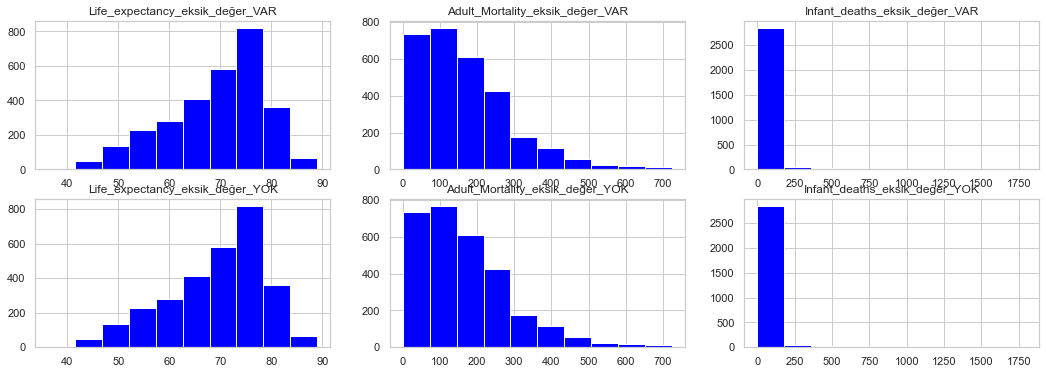

In [32]:
plt.figure(figsize=(18,6))

for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(df[variables[i]],bins=10,color="blue")
    plt.title(variables[i]+"_eksik_değer_VAR")
    
for i in range(3):
    plt.subplot(2,3,i+4)
    plt.hist(df[variables[i]],bins=10,color="blue")
    plt.title(variables[i]+"_eksik_değer_YOK")

plt.show()

In [33]:
print("--"*1000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bölüm 4 : AYKIRI DEĞER TESPİTİ

## 4.1 Box Plot ile Görsel İnceleme

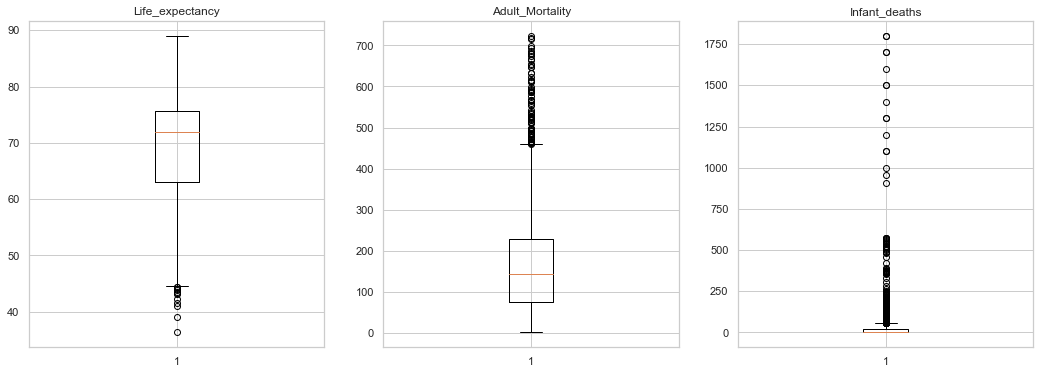

In [34]:
plt.figure(figsize=(18,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.boxplot(df[variables[i]]) # farklı yöntem, df[variables[i]].plot(kind="box")
    plt.title(variables[i])

plt.show()

## 4.2 Z-Score ile İnceleme

In [35]:
from scipy.stats import zscore

### 4.2.1 "Z-Score=1" için inceleme

In [36]:
# variables önceden tanımlandı
# variables = ["Life_expectancy","Adult_Mortality","Infant_deaths"]

for variable in variables:
    z_scores = zscore(df[variable])
    print(variable + " için zscore > 1 veri sayısı: {} ".format(len(np.where(z_scores>1)[0])))
    print("--"*10)

Life_expectancy için zscore > 1 veri sayısı: 400 
--------------------
Adult_Mortality için zscore > 1 veri sayısı: 405 
--------------------
Infant_deaths için zscore > 1 veri sayısı: 110 
--------------------


### 4.2.2 "Z-score"  1 ve 5 arası inceleme

In [37]:
for variable in variables:
    z_scores = zscore(df[variable])
    print("Değişken : {}".format(variable))
    for threshold in range(1,5):
        print("Threshold değeri : {}".format(threshold))
        print("Aykırı değer sayısı {}".format(len((np.where(z_scores>threshold)[0]))))
        print("--"*10)
    print("--"*10)
    print("--"*10)

Değişken : Life_expectancy
Threshold değeri : 1
Aykırı değer sayısı 400
--------------------
Threshold değeri : 2
Aykırı değer sayısı 11
--------------------
Threshold değeri : 3
Aykırı değer sayısı 0
--------------------
Threshold değeri : 4
Aykırı değer sayısı 0
--------------------
--------------------
--------------------
Değişken : Adult_Mortality
Threshold değeri : 1
Aykırı değer sayısı 405
--------------------
Threshold değeri : 2
Aykırı değer sayısı 137
--------------------
Threshold değeri : 3
Aykırı değer sayısı 40
--------------------
Threshold değeri : 4
Aykırı değer sayısı 11
--------------------
--------------------
--------------------
Değişken : Infant_deaths
Threshold değeri : 1
Aykırı değer sayısı 110
--------------------
Threshold değeri : 2
Aykırı değer sayısı 56
--------------------
Threshold değeri : 3
Aykırı değer sayısı 37
--------------------
Threshold değeri : 4
Aykırı değer sayısı 29
--------------------
--------------------
--------------------


Değerlenedirme;

1. z Score yöntemi ile görülmüştürki, her bir değişken birbirinden farklı outlier sayılarına sahiptir.
2. Özellikle "Infant_deaths" ve "Adult_mortalitiy" aykırı değer sayıları yüksektir.
3. Daha detaylı analiz için Tukey methoduna geçilebilir

## 4.3 Tukey Methodu

In [38]:
q75,q25 = np.percentile(df["Life_expectancy"],[75,25])
IQR = q75 - q25

In [39]:
threshold_values = []
for variable in variables:
    for threshold_value in np.arange(1,5,0.5):
        min_value = q25 - (IQR*threshold_value)
        max_value = q75 + (IQR*threshold_value)
        outlier_value_number = len((np.where((df[variable] > max_value) | (df[variable] < min_value))[0]))
        threshold_values.append({"Değişken":variable,"Threshold değeri: ":threshold_value,"Aykırı değer sayısı":outlier_value_number})
        
pd.DataFrame(threshold_values)

,Değişken,Threshold değeri:,Aykırı değer sayısı
0,Life_expectancy,1.0,138
1,Life_expectancy,1.5,12
2,Life_expectancy,2.0,1
3,Life_expectancy,2.5,0
4,Life_expectancy,3.0,0
5,Life_expectancy,3.5,0
6,Life_expectancy,4.0,0
7,Life_expectancy,4.5,0
8,Adult_Mortality,1.0,2503
9,Adult_Mortality,1.5,2412


Değerlendirme;
1. "Adult_Mortality" ve "Infant_deaths" değişkeninin aykırı değer sayıları farklı threshol değerleri için döngü yardımıyla gözlemlenmiştir.
2. Winsorize yöntemiyle kısıtlama adımlarına geçilebilir.

## 4.4 Winsorize

Gerekli kütüphaneyi import ediyoruz.

In [40]:
from scipy.stats.mstats import winsorize

### 4.4.1 Değişkenleri winsorize uygulanmış ve uygulanmamış olarak BOXPLOT ile  karşılaştırıyoruz.

İlk başta 0.1 ve 0.1 aralıklarını uyguluyoruz.

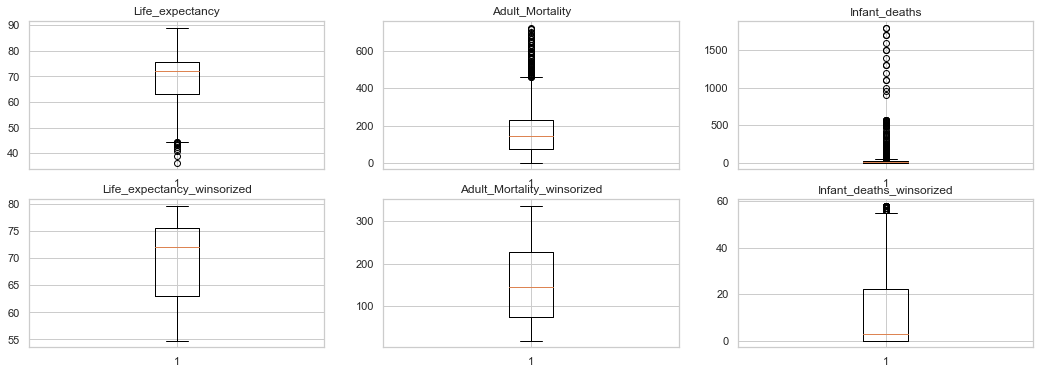

In [41]:
plt.figure(figsize=(18,6))

for i in range(3):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[variables[i]])
    plt.title(variables[i])
    
for i in range(3):
    plt.subplot(2,3,i+4)
    winsorizing = winsorize(np.array(df[variables[i]]),(0.1,0.1))
    plt.boxplot(winsorizing) 
    plt.title(variables[i]+"_winsorized")
    
plt.show()

Değerlendirme;
1. Life_expectancy için Q1 altında
2. Adult_Mortality için Q3 üstünde
3. Infant_deaths için ise Q3 üstünde çok fazla aykırı değer var

Histogram ile de bakmakta fayda var.

### 4.4.2 Değişkenleri winsorize uygulanmış ve uygulanmamış olarak HİSTOGRAM ile karşılaştırıyoruz.

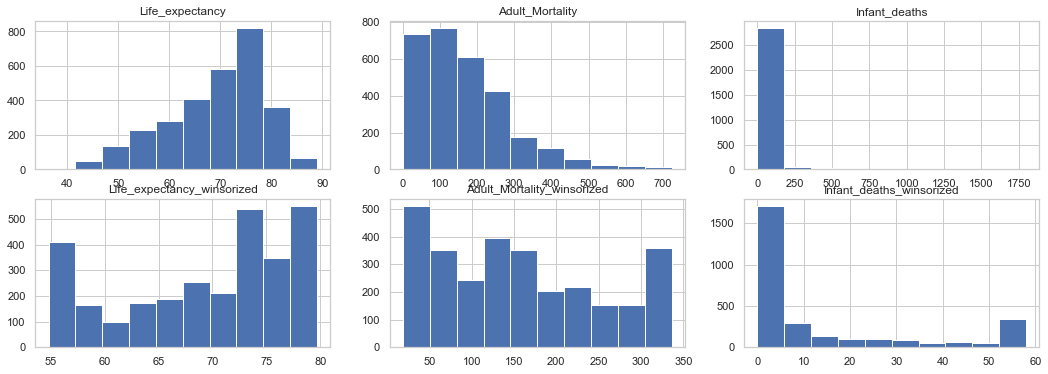

In [42]:
plt.figure(figsize=(18,6))

for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i])
    
for i in range(3):
    plt.subplot(2,3,i+4)
    winsorizing = winsorize(np.array(df[variables[i]]),(0.1,0.1))
    plt.hist(winsorizing) 
    plt.title(variables[i]+"_winsorized")
    
plt.show()

Değerlendirme;
1. "Adult_mortality" ve "Infant deaths" değişkeni için farklı aralıkları deneyebiliriz.
2. Bu nedenle max. ve min noktalarını inceleyelim.

### 4.4.3 Değişkenlerin winsorize uygulanmış olarak max ve min değerlerini inceliyoruz

In [43]:
np.percentile(df["Life_expectancy"],[90,10])[1]

54.8

döngü ile hepsine bakalım

In [44]:
for variable in variables:
    print("Değişken : {}".format(variable))
    print("max: " + str(np.percentile(df[variable],[90,10])[0]),"min: " + str(np.percentile(df[variable],[90,10])[1]))
    print("--"*10)

Değişken : Life_expectancy
max: 79.7 min: 54.8
--------------------
Değişken : Adult_Mortality
max: 336.0 min: 19.0
--------------------
Değişken : Infant_deaths
max: 58.0 min: 0.0
--------------------


288 değişken 336dan büyük ve 336 sayısına gelecek

In [45]:
len(df[df["Adult_Mortality"]>336]["Adult_Mortality"])

288

290 değişken 58den büyük ve 58 sayısına getirilecek

In [46]:
len(df[df["Infant_deaths"]>58]["Infant_deaths"])

290

### 4.4.4 Winsorize değerlerini 0.1,0.1 değerlerinden farklı değerleri uygulayalım

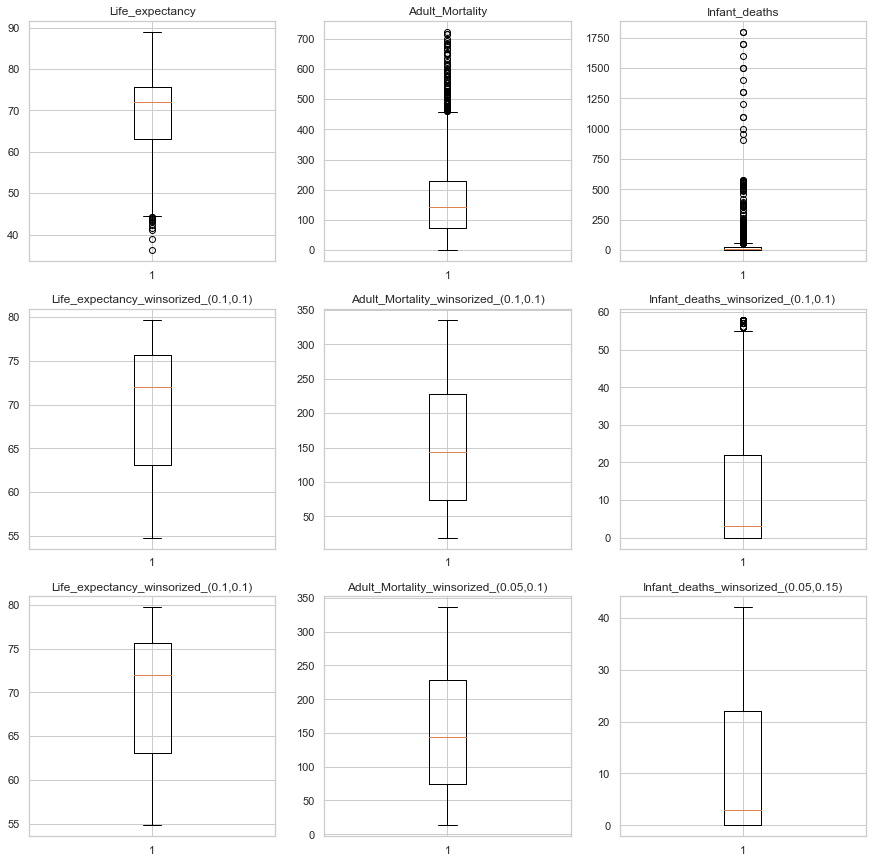

In [47]:
plt.figure(figsize=(15,15))

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[variables[i]])
    plt.title(variables[i])
    
for i in range(3):
    plt.subplot(3,3,i+4)
    winsorizing = winsorize(np.array(df[variables[i]]),(0.1,0.1))
    plt.boxplot(winsorizing) 
    plt.title(variables[i]+"_winsorized_(0.1,0.1)")
    
for i in range(3):
    plt.subplot(3,3,i+7)
    if variables[i] == "Life_expectancy": 
        winsorizing = winsorize(np.array(df[variables[i]]),(0.1,0.1))
        plt.boxplot(winsorizing) 
        plt.title(variables[i]+"_winsorized_(0.1,0.1)")
    elif variables[i] == "Adult_Mortality": 
        winsorizing = winsorize(np.array(df[variables[i]]),(0.05,0.1))
        plt.boxplot(winsorizing) 
        plt.title(variables[i]+"_winsorized_(0.05,0.1)")
    elif variables[i] == "Infant_deaths":
        winsorizing = winsorize(np.array(df[variables[i]]),(0.05,0.15))   
        plt.boxplot(winsorizing) 
        plt.title(variables[i]+"_winsorized_(0.05,0.15)")    
    
plt.show()

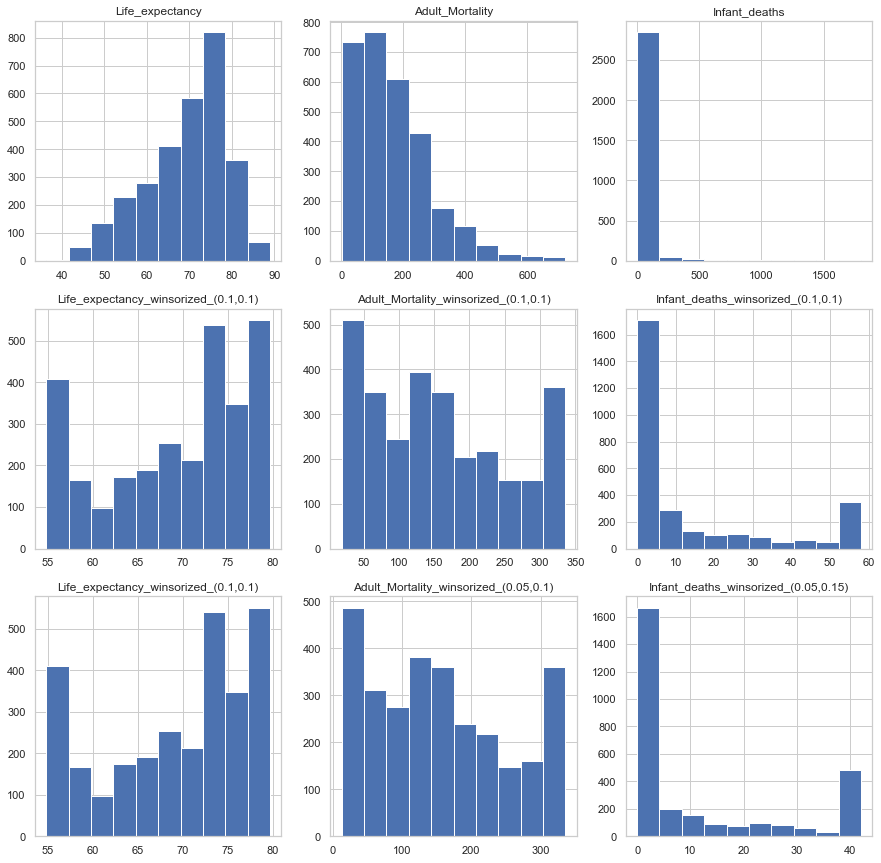

In [48]:
plt.figure(figsize=(15,15))

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i])
    
for i in range(3):
    plt.subplot(3,3,i+4)
    winsorizing = winsorize(np.array(df[variables[i]]),(0.1,0.1))
    plt.hist(winsorizing) 
    plt.title(variables[i]+"_winsorized_(0.1,0.1)")
    
for i in range(3):
    plt.subplot(3,3,i+7)
    if variables[i] == "Life_expectancy": 
        winsorizing = winsorize(np.array(df[variables[i]]),(0.1,0.1))
        plt.hist(winsorizing) 
        plt.title(variables[i]+"_winsorized_(0.1,0.1)")
    elif variables[i] == "Adult_Mortality": 
        winsorizing = winsorize(np.array(df[variables[i]]),(0.05,0.1))
        plt.hist(winsorizing) 
        plt.title(variables[i]+"_winsorized_(0.05,0.1)")
    elif variables[i] == "Infant_deaths":
        winsorizing = winsorize(np.array(df[variables[i]]),(0.05,0.15))   
        plt.hist(winsorizing) 
        plt.title(variables[i]+"_winsorized_(0.05,0.15)")    
    
plt.show()

### 4.4.5 Logaritması alınsaydı "Life_expectancy" aykırı değerler ne durumda olurdu, inceleyelim

In [49]:
q75_log,q25_log = np.percentile(np.log(df["Life_expectancy"]),[75,25])
IQR_log = q75_log - q25_log

In [50]:
log_threshold_values = []    
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    min_value_log = q25_log - (IQR_log*threshold_value)
    max_value_log = q75_log + (IQR_log*threshold_value)
    outlier_value_number_log = len((np.where((np.log(df["Life_expectancy"]) > max_value_log) | 
                                             (np.log(df["Life_expectancy"]) < min_value_log))[0]))
    outlier_value_number = len((np.where((df["Life_expectancy"] > max_value) | 
                                             (df["Life_expectancy"] < min_value))[0]))    
    log_threshold_values.append({"threshold_value":threshold_value,
                                 "outlier_value_number":outlier_value_number,
                                 "outlier_value_number_log":outlier_value_number_log})  

pd.DataFrame(log_threshold_values)


,threshold_value,outlier_value_number,outlier_value_number_log
0,1.0,138,211
1,1.5,12,82
2,2.0,1,9
3,2.5,0,2
4,3.0,0,1
5,3.5,0,0
6,4.0,0,0
7,4.5,0,0


### 4.4.6 Logaritması alınsaydı Tüm Değişkenlerin aykırı değerler ne durumda olurdu, inceleyelim

In [51]:
log_threshold_values = []
for variable in variables:
    for threshold_value in np.arange(1,5,0.5):
        min_value = q25 - (IQR*threshold_value)
        max_value = q75 + (IQR*threshold_value)
        min_value_log = q25_log - (IQR_log*threshold_value)
        max_value_log = q75_log + (IQR_log*threshold_value)
        outlier_value_number_log = len((np.where((np.log(df[variable]) > max_value_log) | 
                                             (np.log(df[variable]) < min_value_log))[0]))
        outlier_value_number = len((np.where((df[variable] > max_value) | 
                                             (df[variable] < min_value))[0]))    
        log_threshold_values.append({"variable":variable,"threshold_value":threshold_value,
                                 "outlier_value_number":outlier_value_number,
                                 "outlier_value_number_log":outlier_value_number_log})  

pd.DataFrame(log_threshold_values)

,variable,threshold_value,outlier_value_number,outlier_value_number_log
0,Life_expectancy,1.0,138,211
1,Life_expectancy,1.5,12,82
2,Life_expectancy,2.0,1,9
3,Life_expectancy,2.5,0,2
4,Life_expectancy,3.0,0,1
5,Life_expectancy,3.5,0,0
6,Life_expectancy,4.0,0,0
7,Life_expectancy,4.5,0,0
8,Adult_Mortality,1.0,2503,2496
9,Adult_Mortality,1.5,2412,2371


Text(0, 0.5, 'Number of Outliers')

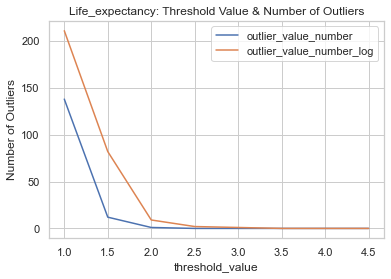

In [52]:
pd.DataFrame(log_threshold_values[0:8]).plot(x="threshold_value",y=["outlier_value_number","outlier_value_number_log"])
plt.title("Life_expectancy: Threshold Value & Number of Outliers")
plt.ylabel("Number of Outliers")

Text(0, 0.5, 'Number of Outliers')

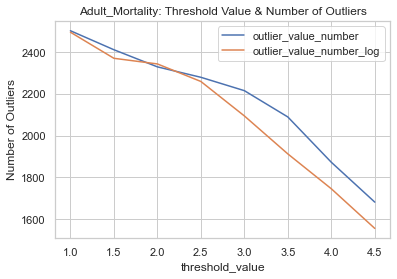

In [53]:
pd.DataFrame(log_threshold_values[8:16]).plot(x="threshold_value",y=["outlier_value_number","outlier_value_number_log"])
plt.title("Adult_Mortality: Threshold Value & Number of Outliers")
plt.ylabel("Number of Outliers")

Text(0, 0.5, 'Number of Outliers')

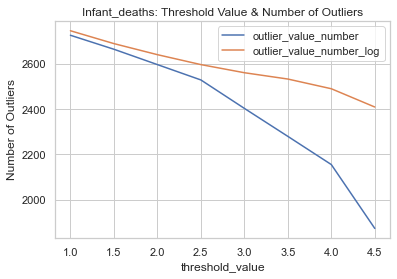

In [54]:
pd.DataFrame(log_threshold_values[16:24]).plot(x="threshold_value",y=["outlier_value_number","outlier_value_number_log"])
plt.title("Infant_deaths: Threshold Value & Number of Outliers")
plt.ylabel("Number of Outliers")

Değerlendirme,
1. Logaritması alınmış değerin aykırı değer sayısı kimi yerlerde çok daha fazla çıkmıştır
2. Logaritmas alınması aykırı değerleri belirgin olarak azaltmamıştır

In [55]:
print("--"*1000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bölüm 5 : TEK DEĞİŞKENLİ ANALİZ

## 5.1 Seçilen 3 değişkeni winsorize olarak veri setine ekleyelim

In [56]:
df["winsorize_Life_expectancy"] = winsorize(df["Life_expectancy"],(0.10,0.10))
df["winsorize_Adult_Mortality"] = winsorize(df["Adult_Mortality"], (0.05,0.10))
df["winsorize_Infant_deaths"] = winsorize(df["Infant_deaths"], (0.05,0.15))

In [57]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,263.0,42.0
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,271.0,42.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,268.0,42.0
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,272.0,42.0
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,275.0,42.0


## 5.2 Seçilen 3 değişkeni görsel olarak inceleyelim

In [58]:
# variables = [] Önceden tanımlandı
winsorize_variables = ["winsorize_Life_expectancy","winsorize_Adult_Mortality","winsorize_Infant_deaths"]

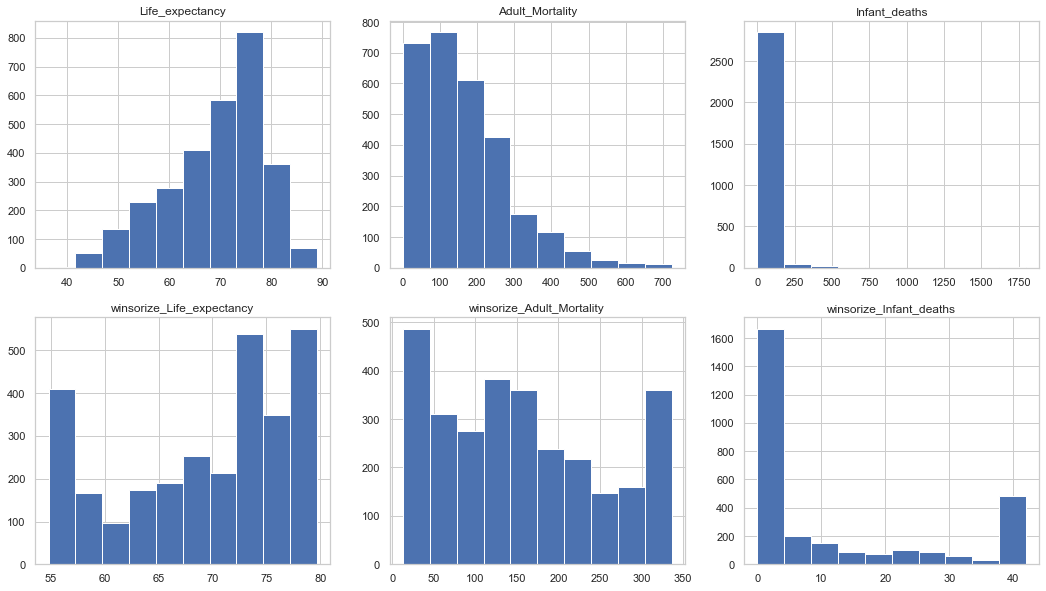

In [59]:
plt.figure(figsize=(18,10))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i])
for i in range(3):
    plt.subplot(2,3,i+4)
    plt.hist(df[winsorize_variables[i]])
    plt.title(winsorize_variables[i])

## 5.3 Kategorik Değişkenler

In [60]:
df.groupby("Status").mean()

,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
Status,,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,...,0.100000,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474,77.893750,80.189453,1.494141
Developing,2007.522671,67.107997,182.696002,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,...,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256,67.574485,171.274320,14.144270


In [61]:
df.groupby("Status")["Status"].count()

Status
Developed      512
Developing    2426
Name: Status, dtype: int64

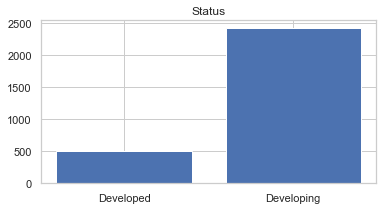

In [62]:
plt.figure(figsize=(6,3))
plt.bar(df.groupby("Status")["Status"].count().index,df.groupby("Status")["Status"].count())
plt.title("Status")
plt.show()


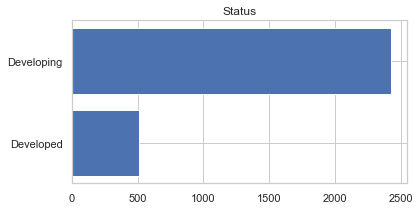

In [63]:
plt.figure(figsize=(6,3))
plt.barh(df.groupby("Status")["Status"].count().index,df.groupby("Status")["Status"].count())
plt.title("Status")
plt.show()

In [64]:
print("--"*1000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bölüm:6 Çok Değişkenli Analiz

## 6.1 Scatter Plot ile İnceleme

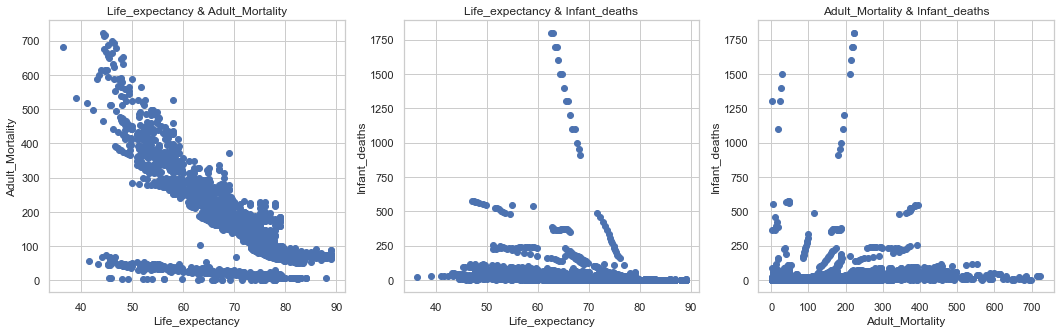

In [65]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(df["Life_expectancy"],df["Adult_Mortality"])
plt.title("Life_expectancy & Adult_Mortality")
plt.xlabel("Life_expectancy")
plt.ylabel("Adult_Mortality")

plt.subplot(1,3,2)
plt.scatter(df["Life_expectancy"],df["Infant_deaths"])
plt.title("Life_expectancy & Infant_deaths")
plt.xlabel("Life_expectancy")
plt.ylabel("Infant_deaths")

plt.subplot(1,3,3)
plt.scatter(df["Adult_Mortality"],df["Infant_deaths"])
plt.title("Adult_Mortality & Infant_deaths")
plt.xlabel("Adult_Mortality")
plt.ylabel("Infant_deaths")

plt.show()

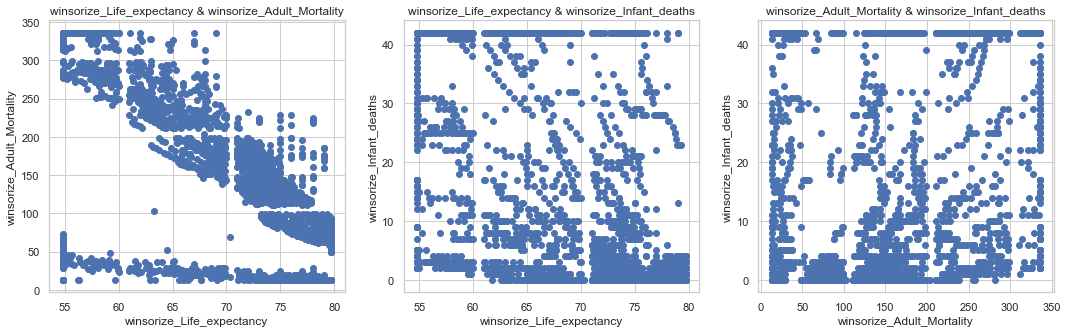

In [66]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(df["winsorize_Life_expectancy"],df["winsorize_Adult_Mortality"])
plt.title("winsorize_Life_expectancy & winsorize_Adult_Mortality")
plt.xlabel("winsorize_Life_expectancy")
plt.ylabel("winsorize_Adult_Mortality")

plt.subplot(1,3,2)
plt.scatter(df["winsorize_Life_expectancy"],df["winsorize_Infant_deaths"])
plt.title("winsorize_Life_expectancy & winsorize_Infant_deaths")
plt.xlabel("winsorize_Life_expectancy")
plt.ylabel("winsorize_Infant_deaths")

plt.subplot(1,3,3)
plt.scatter(df["winsorize_Adult_Mortality"],df["winsorize_Infant_deaths"])
plt.title("winsorize_Adult_Mortality & winsorize_Infant_deaths")
plt.xlabel("winsorize_Adult_Mortality")
plt.ylabel("winsorize_Infant_deaths")

plt.show()

Scatter plot ile verileri incelemek biraz zor oldu.
Korelasyon incelemek daha iyi olabilir.

## 6.2 Heat Map ile Korelasyon İnceleme

In [67]:
df.corr()

,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
Year,1.000000,0.168309,-0.079264,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,...,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400,0.137232,-0.053046,-0.047784
Life_expectancy,0.168309,1.000000,-0.695730,-0.196197,0.404614,0.382069,0.255610,-0.157298,0.563196,-0.222151,...,-0.555929,0.461541,-0.021499,-0.475576,-0.469989,0.724326,0.748793,0.982393,-0.658620,-0.582812
Adult_Mortality,-0.079264,-0.695730,1.000000,0.078762,-0.194329,-0.242587,-0.160583,0.031226,-0.386212,0.094134,...,0.523245,-0.295682,-0.013633,0.302743,0.308263,-0.457282,-0.451610,-0.688994,0.954446,0.376901
Infant_deaths,-0.037415,-0.196197,0.078762,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,...,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720,-0.203322,0.088589,0.431850
Alcohol,-0.052990,0.404614,-0.194329,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,...,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378,0.420679,-0.219979,-0.354667
Percentage_expenditure,0.031400,0.382069,-0.242587,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,...,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687,0.369457,-0.266816,-0.235006
Hepatitis_B,0.104333,0.255610,-0.160583,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,...,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117,0.264908,-0.156792,-0.239438
Measles,-0.082493,-0.157298,0.031226,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,...,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225,-0.151498,0.031084,0.325487
BMI,0.108974,0.563196,-0.386212,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,...,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961,0.581634,-0.400023,-0.459608
under_five_deaths,-0.042937,-0.222151,0.094134,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,...,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373,-0.228306,0.103217,0.443810


In [68]:
df_heatmap = df.corr()

<AxesSubplot:>

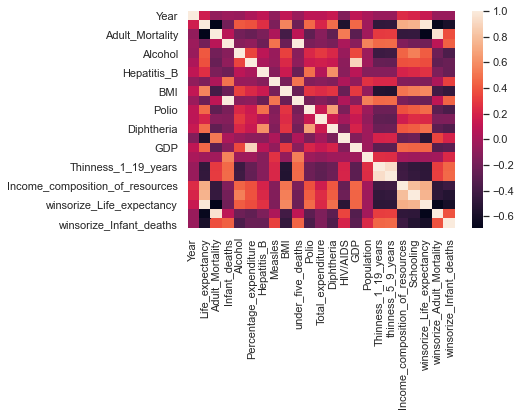

In [69]:
sns.heatmap(df_heatmap)

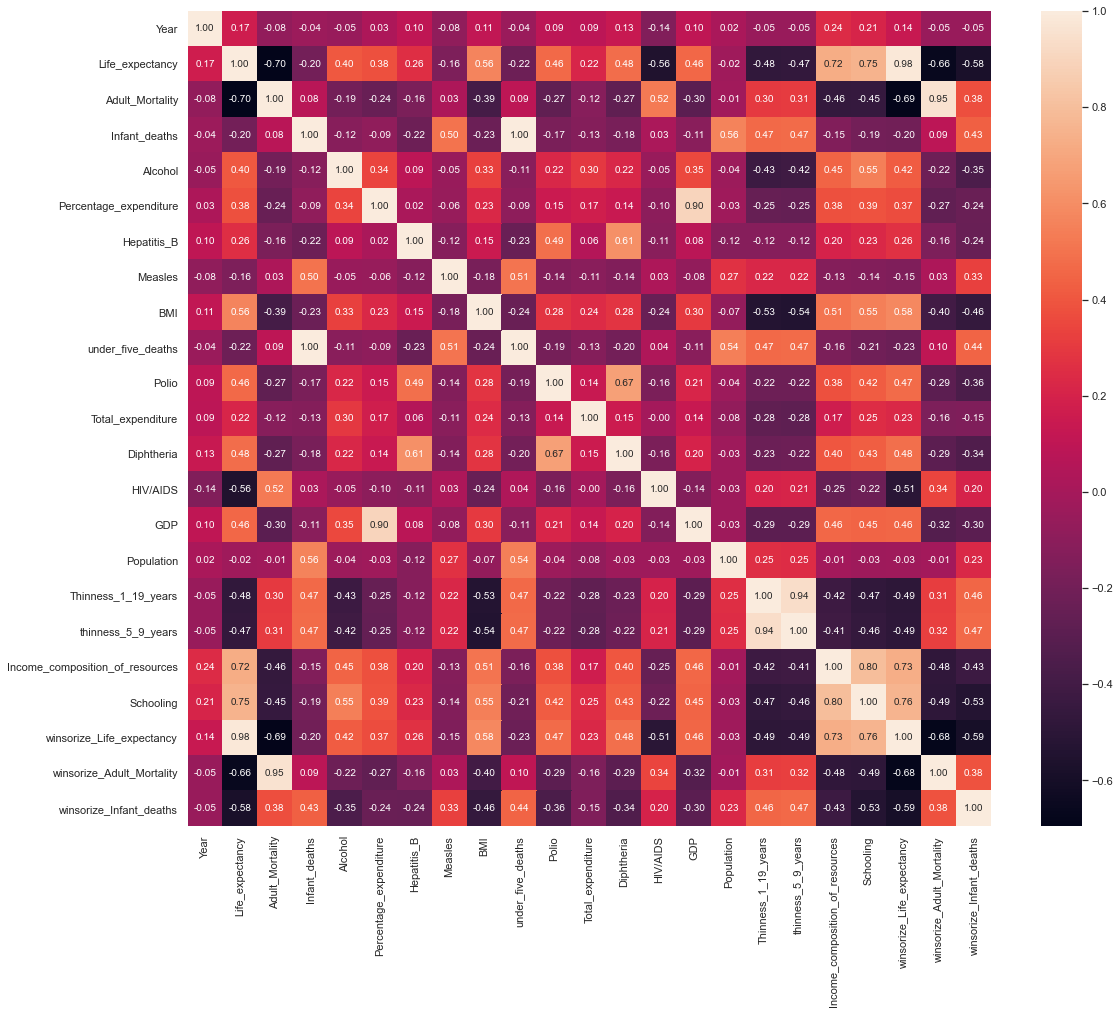

In [70]:
plt.figure(figsize=(18,15))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", annot_kws={"size":10});

1. Life_expectancy ile Adult_Mortalitiy arasındaki negatif oran burada sayısal olarak ortaya çıktı. %-70 oranında bir ilişki var.
2. Life_expectancy ile Infant_deaths arasındaki ilişkiyi tam olarak belirleyemedik. Nedeni burada çıkıyor, %20lik eksi ilişki var.
3. Adult_Mortality ile Infant_deaths arasındaki ilişki ise pozitif ama oldukça düşük %0.08

Life_expectancy, Adult_Mortalitiy ve Infant_deaths değişkenlerini ilk incelemeler için seçmiştik ve aralarındaki ilişkileri gözlemledik. Çok değişkenli analizde farklı değişkenleri inceleyebiliriz.

## 6.3 "Life_expectancy" ile "Year" değişkeni arasındaki ilişkiyi inceleyelim

In [71]:
Life_expectancy_mean = df.groupby('Year').mean()
Life_expectancy_mean

,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
Year,,,,,,,,,,,,,,,,,,,,,
2000,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,...,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717,67.763934,165.169399,13.169399
2001,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,77.950000,...,2.573770,4854.527638,1.007057e+07,4.957459,5.055249,0.563012,10.950289,67.993443,159.896175,13.027322
2002,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,79.679558,...,2.573770,4599.303043,6.625328e+06,5.166298,5.118232,0.568006,11.140462,68.104918,159.333333,12.857923
2003,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,80.353591,...,2.546995,4774.835677,1.015988e+07,4.924309,5.023757,0.572399,11.308092,68.147541,156.185792,12.666667
2004,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,80.165746,...,2.478689,7055.889709,1.685299e+07,4.936464,5.029282,0.584168,11.547399,68.198907,169.311475,12.475410
2005,68.209290,167.633880,32.366120,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,80.972376,...,2.345902,7249.787557,1.828185e+07,5.099448,5.195580,0.596445,11.675723,68.677049,154.852459,12.289617
2006,68.667760,170.404372,31.808743,4.917692,828.776319,81.894040,2063.224044,37.534254,44.273224,84.527473,...,2.169399,7347.033143,1.536564e+07,5.115470,5.157459,0.632312,11.917919,68.878689,158.502732,12.174863
2007,69.036066,159.808743,30.612022,5.014066,954.458468,81.584906,1557.540984,36.977901,42.732240,84.802198,...,1.992896,8537.243114,1.853530e+07,5.034807,4.976243,0.639000,12.038150,69.118033,150.852459,11.989071
2008,69.427869,174.519126,29.568306,5.007088,1095.802669,83.644172,1523.229508,38.225414,41.322404,85.565934,...,1.797268,10604.040364,9.487742e+06,4.907182,4.941436,0.645717,12.176301,69.446448,165.229508,11.896175


### 6.3.1 Yıllara göre ortalama olarak Life_expectancy dağılımı

In [72]:
Life_expectancy_mean = df.groupby('Year').mean()[:]['Life_expectancy']
Life_expectancy_mean

Year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    70.978756
2014    71.536612
2015    71.616940
Name: Life_expectancy, dtype: float64

In [73]:
df_Life_expectancy_mean = pd.DataFrame({"Year":Life_expectancy_mean.index, "Life_expectancy":Life_expectancy_mean.values})
df_Life_expectancy_mean

,Year,Life_expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448
5,2005,68.209290
6,2006,68.667760
7,2007,69.036066
8,2008,69.427869
9,2009,69.938251


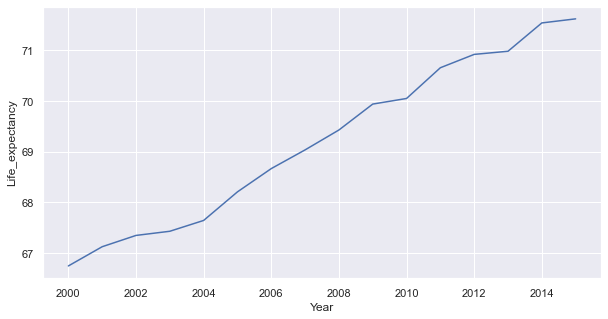

In [74]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
grafik_1 = sns.lineplot(x = 'Year', y = 'Life_expectancy', data = df_Life_expectancy_mean)

### 6.3.2 "Year" ve "Status" kategorisine göre Life_Expectancy İnceleme

In [75]:
df_Life_expectancy_status = df.groupby(["Year","Status"]).mean()
df_Life_expectancy_status

Life_expectancy  Adult_Mortality  Infant_deaths    Alcohol  \
Year Status                                                                   
2000 Developed         76.803125        91.718750       1.781250   9.930625   
     Developing        64.619868       200.496689      45.119205   3.427267   
2001 Developed         77.128125        90.281250       1.750000   9.861250   
     Developing        65.009934       193.158940      44.258278   3.423800   
2002 Developed         77.546875        86.468750       1.718750  10.018125   
     Developing        65.190728       189.443709      42.761589   3.518067   
2003 Developed         77.940625        81.937500       1.656250  10.126562   
     Developing        65.206623       187.609272      41.913907   3.530800   
2004 Developed         78.384375        84.468750       1.656250  10.188750   
     Developing        65.370861       207.834437      40.423841   3.594200   
2005 Developed         78.590625        89.593750       1.593750  10.108125   
     Developing        66.009272       184.172185      38.887417   3.716376   
2006 Developed         79.131250        93.531250       1.593750  10.230937   
     Developing        66.450331       186.695364      38.211921   3.784200   
2007 Developed         79.300000        75.906250       1.562500  10.307812   
     Developing        66.860927       177.589404      36.768212   3.884733   
2008 Developed         78.931250        77.062500       1.500000  10.263125   
     Developing        67.413907       195.172185      35.516556   3.885800   
2009 Developed         79.584375        76.750000       1.437500   9.906875   
     Developing        67.894040       181.754967      34.788079   3.818800   
2010 Developed         80.146875        74.531250       1.343750   9.814063   
     Developing        67.908609       180.370861      33.562914   3.904600   
2011 Developed         80.706250        65.687500       1.343750   9.780000   
     Developing        68.523841       175.788079      32.231788   3.824533   
2012 Developed         80.443750        71.093750       1.281250   9.811875   
     Developing        68.898013       165.258278      31.649007   2.927800   
2013 Developed         80.681250        66.656250       1.250000   9.699688   
     Developing        69.050311       165.133540      28.484472   2.762138   
2014 Developed         81.137500        74.406250       1.250000   7.734063   
     Developing        69.501987       164.430464      29.496689   2.319267   
2015 Developed         80.709375        74.875000       1.187500   6.780000   
     Developing        69.690066       169.390728      28.596026   2.305000   

                 Percentage_expenditure  Hepatitis_B      Measles        BMI  \
Year Status                                                                    
2000 Developed              1897.607997    71.470588   810.750000  45.581250   
     Developing              172.127397    74.676471  5480.331126  32.028859   
2001 Developed              2042.071819    75.500000   956.812500  48.950000   
     Developing              193.352604    73.597403  5420.860927  33.383893   
2002 Developed              1741.772286    86.578947  1531.500000  52.315625   
     Developing              208.719722    74.489362  3559.350993  33.844966   
2003 Developed              1532.335532    87.200000   701.156250  49.487500   
     Developing              274.811662    71.738739  4346.172185  33.638255   
2004 Developed              2962.759738    91.900000   331.437500  50.031250   
     Developing              308.140430    75.627119  3329.801325  33.681879   
2005 Developed              2955.573378    89.050000   201.000000  49.731250   
     Developing              371.449443    79.629921  3836.218543  32.574497   
2006 Developed              3507.076451    93.850000   250.156250  51.940625   
     Developing              261.189536    80.068702  2447.450331  34.440268   
2007 Developed              3818.033094    93.3333

In [76]:
df_Life_expectancy_status = df.groupby(["Year","Status"]).mean()[:]['Life_expectancy']

In [77]:
df_Life_expectancy_status = pd.DataFrame(df_Life_expectancy_status)
df_Life_expectancy_status

Life_expectancy
Year Status                     
2000 Developed         76.803125
     Developing        64.619868
2001 Developed         77.128125
     Developing        65.009934
2002 Developed         77.546875
     Developing        65.190728
2003 Developed         77.940625
     Developing        65.206623
2004 Developed         78.384375
     Developing        65.370861
2005 Developed         78.590625
     Developing        66.009272
2006 Developed         79.131250
     Developing        66.450331
2007 Developed         79.300000
     Developing        66.860927
2008 Developed         78.931250
     Developing        67.413907
2009 Developed         79.584375
     Developing        67.894040
2010 Developed         80.146875
     Developing        67.908609
2011 Developed         80.706250
     Developing        68.523841
2012 Developed         80.443750
     Developing        68.898013
2013 Developed         80.681250
     Developing        69.050311
2014 Developed         81.137500
     Developing        69.501987
2015 Developed         80.709375
     Developing        69.690066

In [78]:
df_Life_expectancy_status.reset_index(level = [0,1], inplace = True)
df_Life_expectancy_status

,Year,Status,Life_expectancy
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875
5,2002,Developing,65.190728
6,2003,Developed,77.940625
7,2003,Developing,65.206623
8,2004,Developed,78.384375
9,2004,Developing,65.370861


<Figure size 1080x720 with 0 Axes>

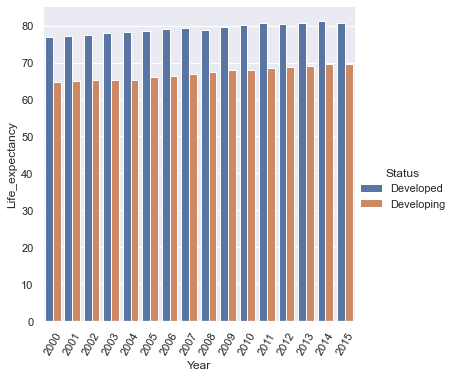

In [79]:
plt.figure(figsize=(15,10))
grafik_2 = sns.catplot(x = 'Year', y = 'Life_expectancy', hue = 'Status', data = df_Life_expectancy_status, kind = 'bar');
grafik_2.set_xticklabels(rotation=60);

### 6.3.3 Minimum Life_Expectancy Olan 10 Ülke

In [80]:
df_least_Life_expectancy = df.groupby("Country").mean().sort_values(['Life_expectancy'])
df_least_Life_expectancy

,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
Country,,,,,,,,,,,,,,,,,,,,,
Sierra Leone,2007.5,46.11250,357.8125,27.5625,3.154667,29.105579,83.444444,673.8750,18.30625,41.8750,...,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.23125,54.80000,264.3125,27.5625
Central African Republic,2007.5,48.51250,333.0625,16.5000,1.231333,40.905543,42.571429,699.4375,17.08750,24.5000,...,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.23750,55.00000,247.7500,16.5000
Lesotho,2007.5,48.78125,550.0625,4.5000,2.086667,82.118913,73.230769,266.6875,25.23750,6.3125,...,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.65625,54.80000,318.2500,4.5000
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,54.87500,299.6875,42.0000
Malawi,2007.5,49.89375,424.4375,37.1250,0.919333,25.849706,89.571429,7559.4375,16.78125,58.7500,...,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.23125,55.34375,283.9375,35.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
France,2007.5,82.21875,73.1250,2.9375,12.404667,3751.506574,51.250000,2661.6250,51.98125,3.4375,...,0.10000,26465.551381,2.758173e+07,0.62500,0.60000,0.870562,15.90000,79.54375,73.2500,2.9375
Switzerland,2007.5,82.33125,55.7500,0.0000,10.338000,9801.810377,NaN,397.5000,51.43750,0.0000,...,0.10000,57362.874601,5.913242e+06,0.53750,0.39375,0.911062,15.39375,79.70000,56.6250,0.0000
Iceland,2007.5,82.44375,49.3750,0.0000,7.466000,4991.595308,NaN,0.0000,51.07500,0.0000,...,0.10000,30159.502908,1.861776e+05,0.95625,0.90000,0.885312,18.15625,79.70000,50.7500,0.0000


In [81]:
df_least_Life_expectancy = df.groupby("Country").mean().sort_values(['Life_expectancy'])
df_least_Life_expectancy = df_least_Life_expectancy[0:10][:]
df_least_Life_expectancy

,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
Country,,,,,,,,,,,,,,,,,,,,,
Sierra Leone,2007.5,46.11250,357.8125,27.5625,3.154667,29.105579,83.444444,673.8750,18.30625,41.8750,...,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.23125,54.80000,264.3125,27.5625
Central African Republic,2007.5,48.51250,333.0625,16.5000,1.231333,40.905543,42.571429,699.4375,17.08750,24.5000,...,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.23750,55.00000,247.7500,16.5000
Lesotho,2007.5,48.78125,550.0625,4.5000,2.086667,82.118913,73.230769,266.6875,25.23750,6.3125,...,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.65625,54.80000,318.2500,4.5000
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,54.87500,299.6875,42.0000
Malawi,2007.5,49.89375,424.4375,37.1250,0.919333,25.849706,89.571429,7559.4375,16.78125,58.7500,...,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.23125,55.34375,283.9375,35.8750
Chad,2007.5,50.38750,227.7500,44.8750,0.411333,32.277320,29.875000,4687.7500,16.31875,78.1250,...,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.08750,54.93750,205.9375,41.9375
Côte d'Ivoire,2007.5,50.38750,417.3125,61.5000,2.837333,0.000000,63.933333,1708.2500,21.32500,86.8125,...,4.68750,NaN,NaN,6.73750,6.69375,NaN,NaN,54.80000,317.9375,42.0000
Zimbabwe,2007.5,50.48750,462.3750,26.5625,4.482000,20.364271,70.562500,923.0000,25.13750,40.8125,...,23.26250,410.980194,8.021343e+06,7.01250,6.98750,0.439125,9.82500,56.15625,282.5625,26.5625
Swaziland,2007.5,51.32500,339.0000,2.6250,4.463333,278.099713,76.000000,49.1250,25.50000,3.6875,...,32.94375,2165.090838,4.573031e+05,6.47500,6.63125,0.515688,10.35000,55.57500,246.1250,2.6250


In [82]:
df_least_Life_expectancy = df_least_Life_expectancy.reset_index(level = [0])
df_least_Life_expectancy

,Country,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
0,Sierra Leone,2007.5,46.11250,357.8125,27.5625,3.154667,29.105579,83.444444,673.8750,18.30625,...,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.23125,54.80000,264.3125,27.5625
1,Central African Republic,2007.5,48.51250,333.0625,16.5000,1.231333,40.905543,42.571429,699.4375,17.08750,...,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.23750,55.00000,247.7500,16.5000
2,Lesotho,2007.5,48.78125,550.0625,4.5000,2.086667,82.118913,73.230769,266.6875,25.23750,...,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.65625,54.80000,318.2500,4.5000
3,Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,54.87500,299.6875,42.0000
4,Malawi,2007.5,49.89375,424.4375,37.1250,0.919333,25.849706,89.571429,7559.4375,16.78125,...,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.23125,55.34375,283.9375,35.8750
5,Chad,2007.5,50.38750,227.7500,44.8750,0.411333,32.277320,29.875000,4687.7500,16.31875,...,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.08750,54.93750,205.9375,41.9375
6,Côte d'Ivoire,2007.5,50.38750,417.3125,61.5000,2.837333,0.000000,63.933333,1708.2500,21.32500,...,4.68750,NaN,NaN,6.73750,6.69375,NaN,NaN,54.80000,317.9375,42.0000
7,Zimbabwe,2007.5,50.48750,462.3750,26.5625,4.482000,20.364271,70.562500,923.0000,25.13750,...,23.26250,410.980194,8.021343e+06,7.01250,6.98750,0.439125,9.82500,56.15625,282.5625,26.5625
8,Swaziland,2007.5,51.32500,339.0000,2.6250,4.463333,278.099713,76.000000,49.1250,25.50000,...,32.94375,2165.090838,4.573031e+05,6.47500,6.63125,0.515688,10.35000,55.57500,246.1250,2.6250
9,Nigeria,2007.5,51.35625,248.5000,535.6875,8.646667,85.444275,42.909091,51653.9375,19.75000,...,4.83125,1360.139877,7.087700e+07,10.41875,10.36875,0.367375,9.00000,55.07500,225.1875,42.0000


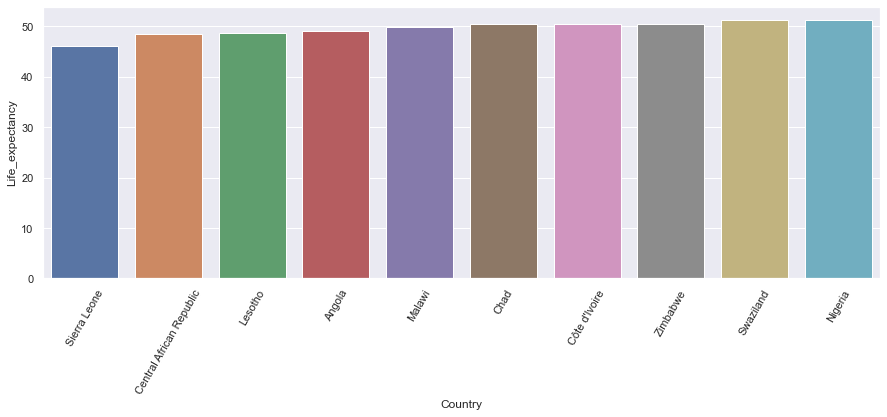

In [83]:
plt.figure(figsize=(15,5))
grafik_3 = sns.barplot(x = df_least_Life_expectancy[:]['Country'], y = df_least_Life_expectancy[:]['Life_expectancy']);
grafik_3.set_xticklabels(grafik_3.get_xticklabels(), rotation=60);

### 6.3.4 Maksimum Life_Expectancy Olan 10 Ülke

In [84]:
df_max_Life_expectancy = df.groupby("Country").mean().sort_values(["Life_expectancy"],ascending=False)
df_max_Life_expectancy = df_max_Life_expectancy[0:10][:]
df_max_Life_expectancy

,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
Country,,,,,,,,,,,,,,,,,,,,,
Japan,2007.5,82.53750,57.1250,2.8750,7.040667,3923.050329,NaN,6875.8125,25.60625,4.0000,...,0.1,24892.544784,9.738406e+04,1.81250,1.54375,0.876562,14.97500,79.70000,57.8750,2.8750
Sweden,2007.5,82.51875,59.1875,0.0000,6.926667,4438.163154,59.200000,18.9375,56.25000,0.0000,...,0.1,29334.990639,5.514868e+06,1.35000,1.30625,0.893125,15.86875,79.69375,59.5625,0.0000
Iceland,2007.5,82.44375,49.3750,0.0000,7.466000,4991.595308,NaN,0.0000,51.07500,0.0000,...,0.1,30159.502908,1.861776e+05,0.95625,0.90000,0.885312,18.15625,79.70000,50.7500,0.0000
Switzerland,2007.5,82.33125,55.7500,0.0000,10.338000,9801.810377,NaN,397.5000,51.43750,0.0000,...,0.1,57362.874601,5.913242e+06,0.53750,0.39375,0.911062,15.39375,79.70000,56.6250,0.0000
France,2007.5,82.21875,73.1250,2.9375,12.404667,3751.506574,51.250000,2661.6250,51.98125,3.4375,...,0.1,26465.551381,2.758173e+07,0.62500,0.60000,0.870562,15.90000,79.54375,73.2500,2.9375
Italy,2007.5,82.18750,54.1875,2.0000,8.266667,2937.137654,95.500000,1961.3750,56.15000,2.3125,...,0.1,21234.782371,2.764379e+07,0.51250,0.52500,0.858062,15.93125,79.68125,55.5000,2.0000
Spain,2007.5,82.06875,63.6250,1.6250,10.024000,2332.680184,92.500000,449.8750,58.66875,1.8750,...,0.1,17093.459737,2.654285e+07,0.60000,0.50000,0.850562,16.35625,79.61250,64.4375,1.6250
Australia,2007.5,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,...,0.1,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.03750,79.68750,63.6250,1.0000
Norway,2007.5,81.79375,66.2500,0.0000,6.234375,4658.813918,NaN,6.3125,50.81250,0.0000,...,0.1,27434.946928,2.614432e+06,0.76250,0.70000,0.931437,17.46875,79.50000,66.6250,0.0000


In [85]:
df_max_Life_expectancy = df_max_Life_expectancy.reset_index(level = [0])
df_max_Life_expectancy

,Country,Year,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,...,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths
0,Japan,2007.5,82.53750,57.1250,2.8750,7.040667,3923.050329,NaN,6875.8125,25.60625,...,0.1,24892.544784,9.738406e+04,1.81250,1.54375,0.876562,14.97500,79.70000,57.8750,2.8750
1,Sweden,2007.5,82.51875,59.1875,0.0000,6.926667,4438.163154,59.200000,18.9375,56.25000,...,0.1,29334.990639,5.514868e+06,1.35000,1.30625,0.893125,15.86875,79.69375,59.5625,0.0000
2,Iceland,2007.5,82.44375,49.3750,0.0000,7.466000,4991.595308,NaN,0.0000,51.07500,...,0.1,30159.502908,1.861776e+05,0.95625,0.90000,0.885312,18.15625,79.70000,50.7500,0.0000
3,Switzerland,2007.5,82.33125,55.7500,0.0000,10.338000,9801.810377,NaN,397.5000,51.43750,...,0.1,57362.874601,5.913242e+06,0.53750,0.39375,0.911062,15.39375,79.70000,56.6250,0.0000
4,France,2007.5,82.21875,73.1250,2.9375,12.404667,3751.506574,51.250000,2661.6250,51.98125,...,0.1,26465.551381,2.758173e+07,0.62500,0.60000,0.870562,15.90000,79.54375,73.2500,2.9375
5,Italy,2007.5,82.18750,54.1875,2.0000,8.266667,2937.137654,95.500000,1961.3750,56.15000,...,0.1,21234.782371,2.764379e+07,0.51250,0.52500,0.858062,15.93125,79.68125,55.5000,2.0000
6,Spain,2007.5,82.06875,63.6250,1.6250,10.024000,2332.680184,92.500000,449.8750,58.66875,...,0.1,17093.459737,2.654285e+07,0.60000,0.50000,0.850562,16.35625,79.61250,64.4375,1.6250
7,Australia,2007.5,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,...,0.1,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.03750,79.68750,63.6250,1.0000
8,Norway,2007.5,81.79375,66.2500,0.0000,6.234375,4658.813918,NaN,6.3125,50.81250,...,0.1,27434.946928,2.614432e+06,0.76250,0.70000,0.931437,17.46875,79.50000,66.6250,0.0000
9,Canada,2007.5,81.68750,64.6250,2.0000,8.053333,4694.078971,28.846154,129.5000,55.86250,...,0.1,29382.907523,1.136405e+07,0.50625,0.43750,0.892188,15.87500,79.63125,65.3125,2.0000


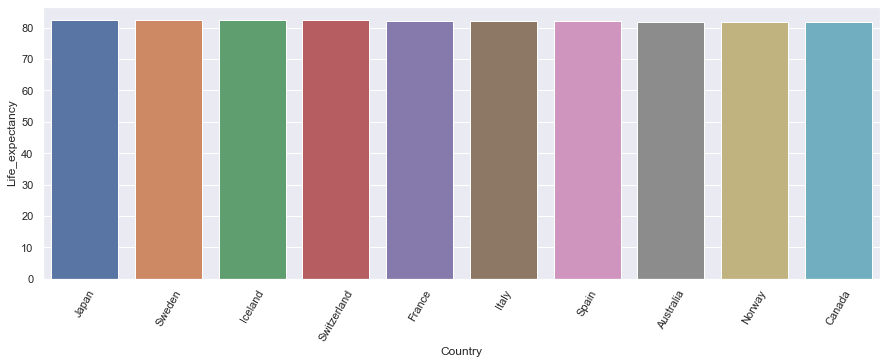

In [86]:
plt.figure(figsize=(15,5))
grafik_4 = sns.barplot(x = df_max_Life_expectancy[:]['Country'], y = df_max_Life_expectancy[:]['Life_expectancy']);
grafik_4.set_xticklabels(grafik_4.get_xticklabels(), rotation=60);

## 6.4 Kategorik Değişken(Status) ile Sürekli Değişken(Life_expectancy) İnceleyelim

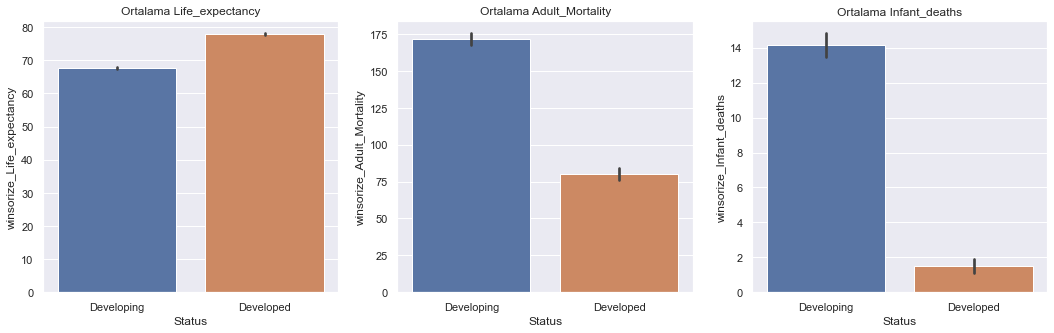

In [87]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["Status"],df["winsorize_Life_expectancy"])
plt.title("Ortalama Life_expectancy")

plt.subplot(1,3,2)
sns.barplot(df["Status"],df["winsorize_Adult_Mortality"])
plt.title("Ortalama Adult_Mortality")

plt.subplot(1,3,3)
sns.barplot(df["Status"],df["winsorize_Infant_deaths"])
plt.title("Ortalama Infant_deaths")

plt.show()

1. Gelişmiş ülkelerde "Life_expectancy" daha iyi seviyede.
2. Gelişmiş ülkelerde "Adult_Mortality" çok daha az seviyede.
3. Gelişmiş ülkelerde "Infant_deaths" gelişmekte olan ülkelere göre neredeyse yok denecek kadar az.

### 6.4.1 TTest ile yukarıdaki ortalama farklılıklarını İstatistiksel olarak bulalım 

1. Null Hypotheses, Ho = Ortalama1 - Ortalama2 = 0
2. Alternative Hypotheses, Ha = Ortalama1 - Ortalama2 != 0

In [88]:
# Test whether group differences are significant.
dereceler = df["Status"].unique()
grup_df = df.groupby("Status")

In [89]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_Life_expectancy", "winsorize_Adult_Mortality", "winsorize_Infant_deaths"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(df[df["Status"]==dereceler[i]][var], 
                                df[df["Status"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_Life_expectancy için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Developing,Developed,-29.604464345908315,0.000000000000000


winsorize_Adult_Mortality için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Developing,Developed,19.714092735309769,0.000000000000000


winsorize_Infant_deaths için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Developing,Developed,17.449754610795615,0.000000000000000


1. P değeri 0a yakın olduğu için Null Hipotezi reddediyor ve Alternatif hipotezi seçiyoruz. 
2. Ortalamaları farklıdır, istatistikse olarak fark vardır.

In [90]:
print("--"*1000)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bölüm:7 Özellik Mühendisliği

## 7.1 Kategorik değişkenlerle çalışmak (Dummy değişken)

In [91]:
pd.get_dummies(df["Status"]).head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [92]:
df = pd.concat([df, pd.get_dummies(df["Status"])], axis=1)
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,...,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,winsorize_Life_expectancy,winsorize_Adult_Mortality,winsorize_Infant_deaths,Developed,Developing
0,Afghanistan,2015,Developing,65.000000000000000,263.000000000000000,62.000000000000000,0.010000000000000,71.279623619999995,65.000000000000000,1154,...,33736494.000000000000000,17.199999999999999,17.300000000000001,0.479000000000000,10.100000000000000,65.000000000000000,263.000000000000000,42.000000000000000,0,1
1,Afghanistan,2014,Developing,59.899999999999999,271.000000000000000,64.000000000000000,0.010000000000000,73.523581680000007,62.000000000000000,492,...,327582.000000000000000,17.500000000000000,17.500000000000000,0.476000000000000,10.000000000000000,59.899999999999999,271.000000000000000,42.000000000000000,0,1
2,Afghanistan,2013,Developing,59.899999999999999,268.000000000000000,66.000000000000000,0.010000000000000,73.219242719999997,64.000000000000000,430,...,31731688.000000000000000,17.699999999999999,17.699999999999999,0.470000000000000,9.900000000000000,59.899999999999999,268.000000000000000,42.000000000000000,0,1
3,Afghanistan,2012,Developing,59.500000000000000,272.000000000000000,69.000000000000000,0.010000000000000,78.184215299999991,67.000000000000000,2787,...,3696958.000000000000000,17.899999999999999,18.000000000000000,0.463000000000000,9.800000000000001,59.500000000000000,272.000000000000000,42.000000000000000,0,1
4,Afghanistan,2011,Developing,59.200000000000003,275.000000000000000,71.000000000000000,0.010000000000000,7.097108703000000,68.000000000000000,3013,...,2978599.000000000000000,18.199999999999999,18.199999999999999,0.454000000000000,9.500000000000000,59.200000000000003,275.000000000000000,42.000000000000000,0,1


## 7.2 Dağılımları İnceleyelim

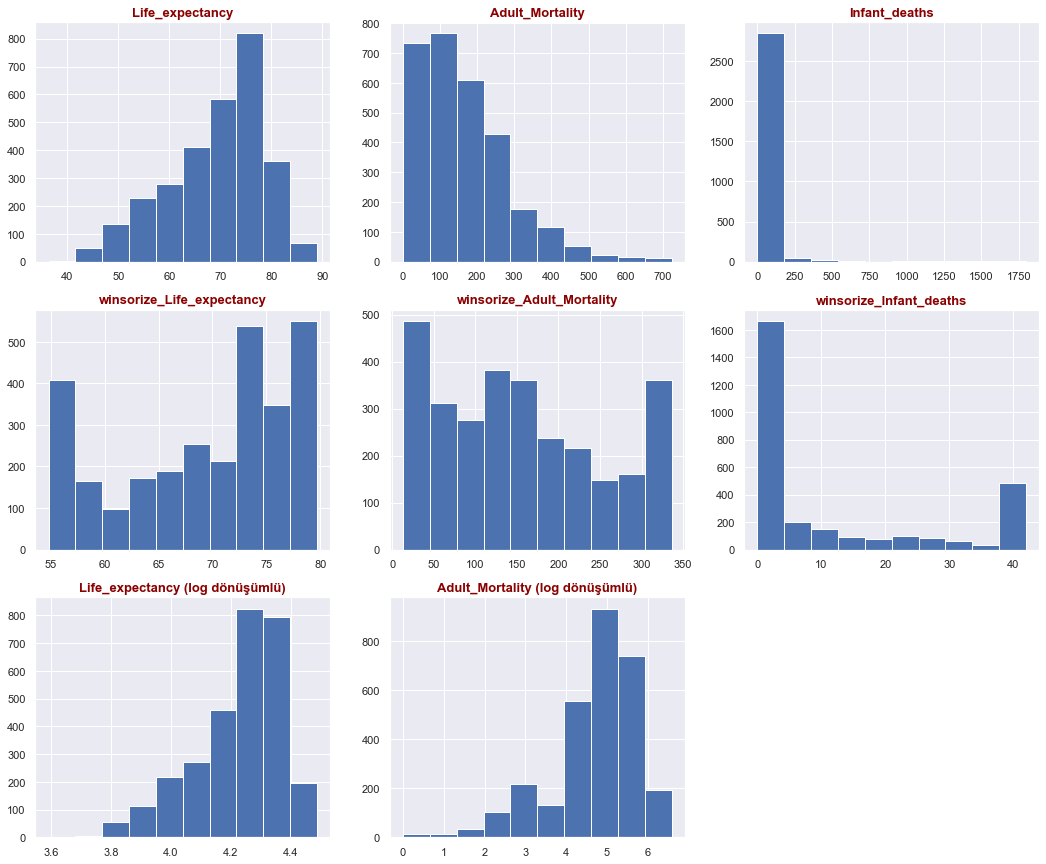

In [93]:
plt.figure(figsize=(18,15))

degiskenler = ['Life_expectancy', 'Adult_Mortality' , 'Infant_deaths']
winsorize_degiskenler = ['winsorize_Life_expectancy', 'winsorize_Adult_Mortality', 'winsorize_Infant_deaths']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(df[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(df[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i], fontdict=baslik_font)
    
for i in range(2):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(df[degiskenler[i]]))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)

plt.show()

winsorize_Infant_deaths çok küçük sayısal değerler olduğu için hata vermektedir. Bu nedenle gösterilmemiştir.

Değerlendirme;

1. Life_expectancy başta normale yakın bir dağılım göstermekteydi ve log transformasyon sonrasıda normale yakın dağılım göstermektedir.
2. Adult_Mortality is log transformasyon sonrası normal dağılıma yakın gözxükmektedir.

## 7.3 Dağılımları İstatistiksel olarak İnceleyelim

In [94]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ['winsorize_Life_expectancy', 'winsorize_Adult_Mortality', 'winsorize_Infant_deaths']
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(df[ozellik]))
    norm_stats = normaltest(np.log(df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,winsorize_Life_expectancy,301.65928,0.00000,507.79165,0.00000
1,winsorize_Adult_Mortality,460.49148,0.00000,334.03135,0.00000
2,winsorize_Infant_deaths,nan,nan,nan,nan


1. H0: Data has normal distribution
2. Ha: Data does not have normal distribution

Değerlendirme;

1. P value 0'a yakın olduğundan null Hipotezi reddediyoruz ve Ha hipotezini kabul ediyoruz. 
2. Veriler Normal dağılmamıştır.

## 7.4 Normalleştirme

In [95]:
from sklearn.preprocessing import normalize

df["norm_winsorize_Life_expectancy"] = normalize(np.array(df["winsorize_Life_expectancy"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorize_Adult_Mortality"] = normalize(np.array(df["winsorize_Adult_Mortality"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorize_Infant_deaths"] = normalize(np.array(df["winsorize_Infant_deaths"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler = ["winsorize_Life_expectancy","norm_winsorize_Life_expectancy","winsorize_Adult_Mortality","norm_winsorize_Adult_Mortality",
                    "winsorize_Infant_deaths","norm_winsorize_Infant_deaths"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
winsorize_Life_expectancy        54.80000
norm_winsorize_Life_expectancy    0.01447
winsorize_Adult_Mortality        13.00000
norm_winsorize_Adult_Mortality    0.00129
winsorize_Infant_deaths           0.00000
norm_winsorize_Infant_deaths      0.00000
dtype: float64

Maksimum Değer
-----------------
winsorize_Life_expectancy         79.70000
norm_winsorize_Life_expectancy     0.02105
winsorize_Adult_Mortality        336.00000
norm_winsorize_Adult_Mortality     0.03344
winsorize_Infant_deaths           42.00000
norm_winsorize_Infant_deaths       0.03936
dtype: float64


Normalleştirdiğimiz değerleri grafik üzerinde görelim.

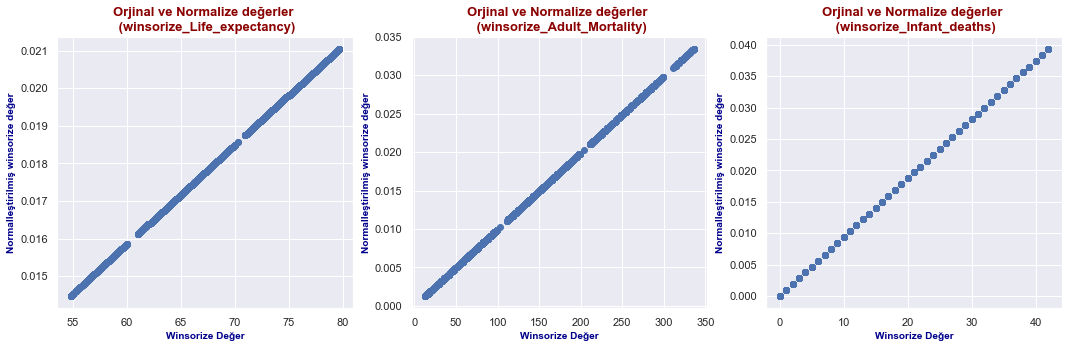

In [96]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[normal_ozellikler[2*i]], df[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Winsorize Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş winsorize değer", fontdict=eksen_font)

plt.show()

## 7.5 Standartlaştırma

In [99]:
from sklearn.preprocessing import scale

df["olcekli_winsorize_Life_expectancy"] = scale(df["winsorize_Life_expectancy"])
df["olcekli_winsorize_Adult_Mortality"] = scale(df["winsorize_Adult_Mortality"])
df["olcekli_winsorize_Infant_deaths"] = scale(df["winsorize_Infant_deaths"])
olcekli_ozellikler=["winsorize_Life_expectancy","olcekli_winsorize_Life_expectancy","winsorize_Adult_Mortality",
                    "olcekli_winsorize_Adult_Mortality","winsorize_Infant_deaths","olcekli_winsorize_Infant_deaths"]

print('Standart Sapmalar\n-----------------',)
print(df[olcekli_ozellikler].std())
print('\nOrtalamalar\n-----------------',)
print(df[olcekli_ozellikler].mean())

Standart Sapmalar
-----------------
winsorize_Life_expectancy             8.16572
olcekli_winsorize_Life_expectancy     1.00017
winsorize_Adult_Mortality           101.07520
olcekli_winsorize_Adult_Mortality     1.00017
winsorize_Infant_deaths              15.65719
olcekli_winsorize_Infant_deaths       1.00017
dtype: float64

Ortalamalar
-----------------
winsorize_Life_expectancy            69.37280
olcekli_winsorize_Life_expectancy     0.00000
winsorize_Adult_Mortality           155.40112
olcekli_winsorize_Adult_Mortality     0.00000
winsorize_Infant_deaths              11.93975
olcekli_winsorize_Infant_deaths       0.00000
dtype: float64


Standardize ettiğimiz değişkenlerin ortalamaları 0 ve standart sapmaları 1 oldu. Standartlaştırfığımız değerleri grafik üzerinde görelim.

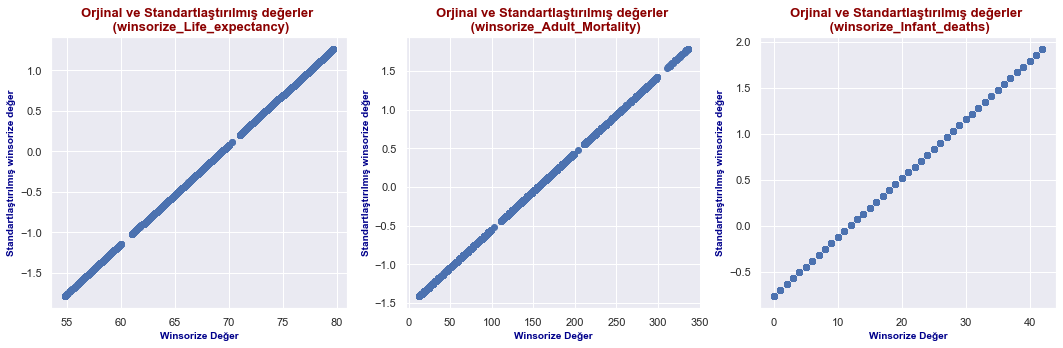

In [100]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[olcekli_ozellikler[2*i]], df[olcekli_ozellikler[2*i+1]])
    plt.title("Orjinal ve Standartlaştırılmış değerler \n ({})".format(olcekli_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Winsorize Değer", fontdict=eksen_font)
    plt.ylabel("Standartlaştırılmış winsorize değer", fontdict=eksen_font)

In [327]:
from scipy.stats import ttest_ind

ttest_value = ttest_ind(df["Life_expectancy"],df["Adult_Mortality"],equal_var=False)

In [328]:
ttest_value

Ttest_indResult(statistic=-41.560479205188244, pvalue=5.088547876317596e-298)

<AxesSubplot:>

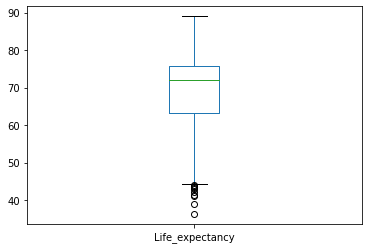

In [270]:
df.Life_expectancy.plot(kind="box")

In [272]:
Q1 = df.Life_expectancy.quantile(0.25)
Q3 = df.Life_expectancy.quantile(0.75)
IQR = Q3 - Q1

Q1,Q3,IQR

(63.1, 75.7, 12.600000000000001)

In [276]:
maks = Q3 + 1.5*IQR

In [1]:
minimum = Q1 - 1.5*IQR

NameError: name 'Q1' is not defined

In [290]:
df.loc[df["Life_expectancy"] > maks]

,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling


In [2]:
df.loc[df["Life_expectancy"] < minimum]

NameError: name 'df' is not defined

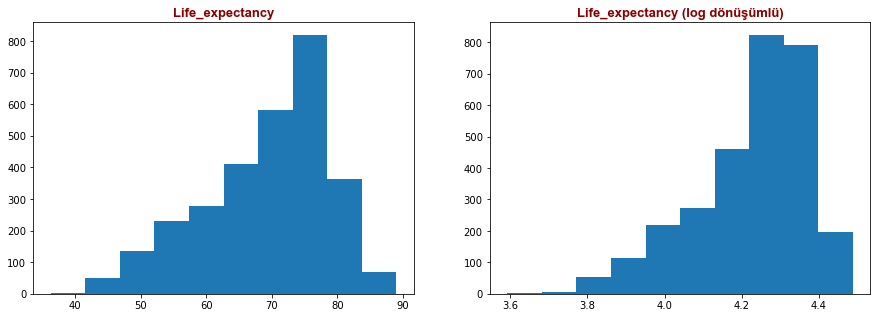

In [321]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df["Life_expectancy"])
plt.title("Life_expectancy", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(np.log(df["Life_expectancy"]))
plt.title("Life_expectancy (log dönüşümlü)", fontdict=baslik_font)
plt.show()

# -----------------------   Bölüm 4 : Görsel Olarak İlk İnceleme  -------------------------

## Developing / Developed karşılaştırması

In [303]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [304]:
df2 = df.copy()

In [305]:
df2.loc[df2["Status"]=="Developing","Status"] = 0
df2.loc[df2["Status"]=="Developed","Status"] = 1

In [306]:
def bar_chart(parameter):
    Developing = df2[df2["Status"] == 0][parameter].value_counts()
    Developed = df2[df2["Status"] == 1][parameter].value_counts()
    df3 = pd.DataFrame([Developing,Developed])
    df3.index = ["Developing","Developed"]
    df3.plot(kind="bar",stacked = True, figsize=(10,5))
    

In [307]:
df2.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

## Life_expectancy

In [308]:
df2.loc[ df2["Life_expectancy"] <= 55, "Life_expectancy"] = 0
df2.loc[ (df2["Life_expectancy"] > 55) & (df2["Life_expectancy"] <= 65),"Life_expectancy"] = 1
df2.loc[ (df2["Life_expectancy"] > 65) & (df2["Life_expectancy"] <= 75),"Life_expectancy"] = 2
df2.loc[ (df2["Life_expectancy"] > 75) & (df2["Life_expectancy"] <= 85),"Life_expectancy"] = 3
df2.loc[ (df2["Life_expectancy"] > 85) ,"Life_expectancy"]=4

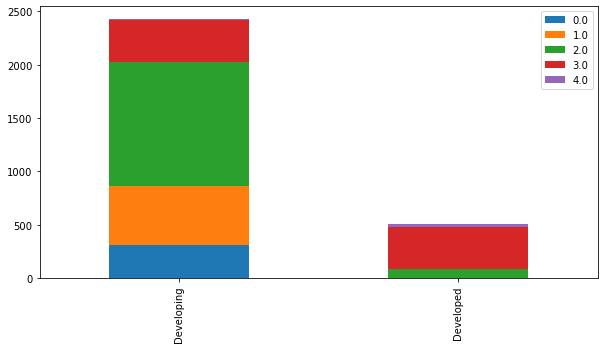

In [323]:
bar_chart("Life_expectancy")

## alternatif fonksiyon

In [324]:
def yas_donustur(age):
    if age > 85: return 4
    elif age >75: return 3
    elif age >65: return 2
    elif age >55: return 1
    else : return 0


In [328]:
df2=df.copy()
df2.Life_expectancy.apply(yas_donustur)

0       1
1       1
2       1
3       1
4       1
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Name: Life_expectancy, Length: 2938, dtype: int64

In [310]:
df.Life_expectancy.isnull().sum()*100/df.Life_expectancy.shape[0]

0.0

In [311]:
df["Life_expectancy"].unique()

array([65.  , 59.9 , 59.5 , 59.2 , 58.8 , 58.6 , 58.1 , 57.5 , 57.3 ,
       57.  , 56.7 , 56.2 , 55.3 , 54.8 , 77.8 , 77.5 , 77.2 , 76.9 ,
       76.6 , 76.2 , 76.1 , 75.3 , 75.9 , 74.2 , 73.5 , 73.  , 72.8 ,
       73.3 , 73.6 , 72.6 , 75.6 , 75.4 , 75.1 , 74.9 , 74.7 , 74.4 ,
       74.1 , 73.8 , 73.4 , 72.9 , 72.3 , 71.7 , 71.6 , 71.4 , 71.3 ,
       52.4 , 51.7 , 51.1 , 56.  , 51.  , 49.6 , 49.1 , 48.7 , 48.2 ,
       47.7 , 47.4 , 47.1 , 46.8 , 46.5 , 45.7 , 45.3 , 76.4 , 75.7 ,
       75.2 , 75.  , 74.8 , 74.6 , 74.  , 76.3 , 76.  , 75.5 , 73.9 ,
       73.2 , 72.7 , 72.  , 82.8 , 82.7 , 82.5 , 82.3 , 82.  , 81.9 ,
       81.7 , 81.3 , 81.2 , 81.  , 86.  , 83.  , 79.9 , 79.5 , 81.5 ,
       81.4 , 81.1 , 88.  , 84.  , 79.8 , 79.4 , 79.3 , 78.8 , 78.7 ,
       78.6 , 78.1 , 72.5 , 72.2 , 71.9 , 71.1 , 78.  , 69.2 , 68.4 ,
       67.8 , 67.5 , 66.6 , 74.5 , 73.1 , 76.8 , 76.7 , 76.5 , 75.8 ,
       71.8 , 71.  , 77.  , 69.9 , 69.5 , 69.1 , 68.6 , 68.2 , 67.3 ,
       66.8 , 66.3 ,

## Infant_deaths

In [312]:
df2.loc[ df2["Infant_deaths"] <= 60, "Infant_deaths"] = 0
df2.loc[ (df2["Infant_deaths"] > 60) & (df2["Infant_deaths"] <= 80),"Infant_deaths"] = 1
df2.loc[ (df2["Infant_deaths"] > 80) & (df2["Infant_deaths"] <= 120),"Infant_deaths"] = 2
df2.loc[ (df2["Infant_deaths"] > 120) & (df2["Infant_deaths"] <= 300),"Infant_deaths"] = 3
df2.loc[ (df2["Infant_deaths"] > 300) ,"Infant_deaths"]=4

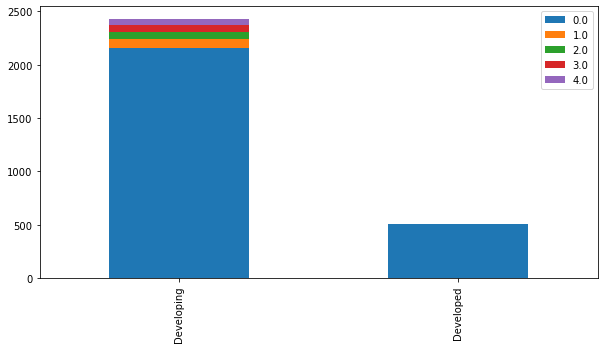

In [313]:
bar_chart("Infant_deaths")

In [314]:
df.Infant_deaths.isnull().sum()*100/df.Infant_deaths.shape[0]

0.0

In [315]:
df["Infant_deaths"].unique()

array([6.20e+01, 6.40e+01, 6.60e+01, 6.90e+01, 7.10e+01, 7.40e+01,
       7.70e+01, 8.00e+01, 8.20e+01, 8.40e+01, 8.50e+01, 8.70e+01,
       8.80e+01, 0.00e+00, 1.00e+00, 2.10e+01, 2.00e+01, 1.90e+01,
       6.70e+01, 7.20e+01, 7.50e+01, 7.80e+01, 8.10e+01, 9.00e+01,
       9.20e+01, 9.40e+01, 9.50e+01, 9.60e+01, 9.70e+01, 8.00e+00,
       9.00e+00, 1.00e+01, 1.10e+01, 1.20e+01, 5.00e+00, 6.00e+00,
       7.00e+00, 9.80e+01, 1.04e+02, 1.11e+02, 1.18e+02, 1.26e+02,
       1.35e+02, 1.44e+02, 1.54e+02, 1.64e+02, 1.74e+02, 1.85e+02,
       1.96e+02, 2.07e+02, 2.19e+02, 2.31e+02, 2.50e+01, 1.30e+01,
       1.40e+01, 1.50e+01, 2.00e+00, 4.20e+01, 4.40e+01, 4.60e+01,
       4.90e+01, 5.10e+01, 5.40e+01, 5.70e+01, 6.10e+01, 6.50e+01,
       7.00e+01, 1.03e+02, 3.80e+01, 3.90e+01, 4.00e+01, 4.10e+01,
       4.30e+01, 4.50e+01, 4.70e+01, 4.80e+01, 2.20e+01, 2.30e+01,
       2.40e+01, 5.80e+01, 5.90e+01, 6.00e+01, 6.30e+01, 1.60e+01,
       1.70e+01, 1.80e+01, 2.70e+01, 5.00e+01, 5.30e+01, 5.60e

## Adult_Mortality

In [316]:
df2.loc[ df2["Adult_Mortality"] <= 100, "Adult_Mortality"] = 0
df2.loc[ (df2["Adult_Mortality"] > 100) & (df2["Adult_Mortality"] <= 200),"Adult_Mortality"] = 1
df2.loc[ (df2["Adult_Mortality"] > 200) & (df2["Adult_Mortality"] <= 300),"Adult_Mortality"] = 2
df2.loc[ (df2["Adult_Mortality"] > 300) & (df2["Adult_Mortality"] <= 400),"Adult_Mortality"] = 3
df2.loc[ (df2["Adult_Mortality"] > 400) ,"Adult_Mortality"]=4

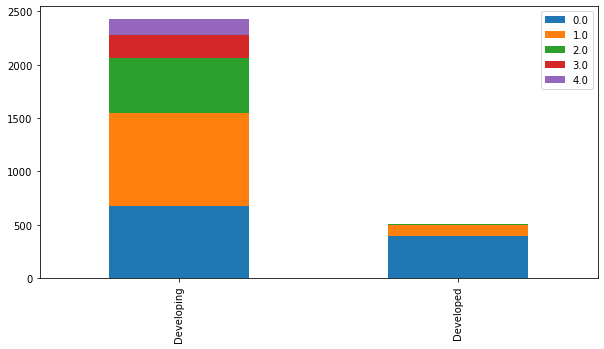

In [317]:
bar_chart("Adult_Mortality")

In [318]:
df.Adult_Mortality.isnull().sum()*100/df.Adult_Mortality.shape[0]

0.0

In [319]:
df["Adult_Mortality"].unique()

array([263. , 271. , 268. , 272. , 275. , 279. , 281. , 287. , 295. ,
       291. , 293. ,   3. , 316. , 321. ,  74. ,   8. ,  84. ,  86. ,
        88. ,  91. ,   1. ,   9. ,  99. ,  15. ,  17. ,  18. ,  14. ,
        11. ,  19. , 112. , 113. , 116. , 119. , 123. , 126. , 129. ,
       132. , 136. , 146. , 145. , 335. , 348. , 355. , 358. , 361. ,
       365. , 369. , 371. , 375. , 381. , 382. , 386. , 388. , 391. ,
        44. ,  48. ,  13. , 131. , 133. , 134. , 138. , 142. , 144. ,
       147. , 149. , 151. , 153. , 154. , 156. , 118. ,  12. , 121. ,
       127. , 137. , 128. , 141. ,  59. ,   6. ,  61. ,  63. ,  64. ,
        66. ,  67. ,  69. ,  71. ,  73. ,  75. ,  78. ,  65. ,  68. ,
         7. ,  77. ,  76. ,  81. ,  85. ,  92. ,  96. , 125. , 162. ,
        16. , 172. , 167. , 161. , 168. , 171. , 174. , 189. , 192. ,
        79. ,  83. ,  87. , 135. , 152. , 155. , 158. , 164. , 173. ,
        98. , 111. , 115. , 117. , 196. , 199. ,  23. , 194. , 232. ,
       222. , 226. ,

# chi square